<a href="https://colab.research.google.com/github/pseudope/2021_F_Level2/blob/main/Projects/20210924_Level2_1st_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

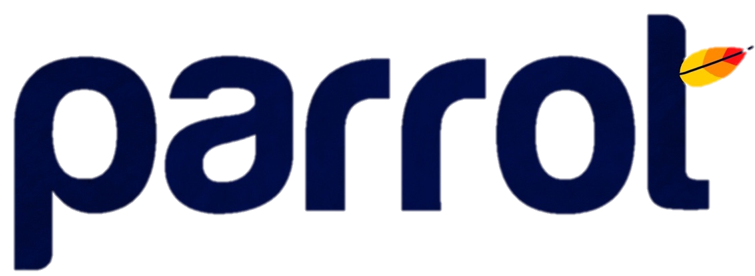

# 20210924 (1<sup>st</sup> Competition)

4기 Level 2 첫 번째 Competition 자료입니다.

# Contents


1. Dataset 개요
2. Competition 일정 및 규칙
3. 참고 자료 및 출처
4. 부록 - Keras에서 (Weighted) F1 Score metric 사용하기

# 1. Dataset 개요

## 3i4k Dataset

* 한국어의 발화 의도를 분류하는 학습에 사용되는 Dataset으로, 서울대학교 Speach Language Processing Lab에서 제공하고 있습니다. 이 Dataset을 분석함으로써 우리는 
화자의 발화 의도를 측정하고, 어떠한 부분에서 (정확도가 부족한 경우에) 음성 data 등의 보조적인 자료를 사용해야 하는지 파악할 수 있습니다.

* Label: determines the intention of the utterance and can be one of fragment(조각구, 0), statement(서술, 1), question(질문, 2), command(요구, 3), rhetorical question(수사의문문, 4), rhetorical command(수사명령문, 5) and intonation-depedent utterance(억양 의존성 발화, 6).

* Text: the text in Korean about common topics like housework, weather, transportation, etc.

* Train Data 55,134개, Test Data 6,121개 (총 61,255개, Test Data의 비중은 약 10%)

* Dataset에 관한 추가적인 설명은 다음을 참고해주시기 바랍니다. <br>
https://docs.google.com/document/d/1-dPL5MfsxLbWs7vfwczTKgBq_1DX9u1wxOgOPn1tOss/edit

## Dataset 구성 방법

아래의 사이트에서 fci_train_val.txt, fci_test.txt를 각각 다운로드 받아서 사용하시면 되겠습니다.

https://github.com/warnikchow/3i4k/tree/master/data/train_val_test

In [ ]:
!wget https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_train_val.txt
!wget https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_test.txt

--2021-09-17 05:11:43--  https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_train_val.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2661060 (2.5M) [text/plain]
Saving to: ‘fci_train_val.txt.5’

fci_train_val.txt.5 100%[===================>]   2.54M  --.-KB/s    in 0.03s   

2021-09-17 05:11:43 (96.4 MB/s) - ‘fci_train_val.txt.5’ saved [2661060/2661060]

--2021-09-17 05:11:43--  https://raw.githubusercontent.com/warnikchow/3i4k/master/data/train_val_test/fci_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response

In [ ]:
def read_data(filename):

    with open(filename, "r", encoding="UTF8") as f:
        data = [line.split("\t") for line in f.read().splitlines()]

    return data

In [ ]:
train_data = read_data("/content/fci_train_val.txt")
X_train_data = [t[1] for t in train_data]
y_train_data = [int(t[0]) for t in train_data]

test_data = read_data("/content/fci_test.txt")
X_test_data = [t[1] for t in test_data]
y_test_data = [int(t[0]) for t in test_data]

In [ ]:
print(len(X_train_data))
print(len(y_train_data))
print(len(X_test_data))
print(len(y_test_data))

55134
55134
6121
6121


이후의 전처리(Augmentation, Tokenization, Stopwords, Vectorization, Validation split 등)는 여러분들에게 맡기겠습니다.

## Pretrained Data

아래의 사이트에서 pretrained된 100차원 fastText data를 제공하고 있습니다. 원하실 경우 사용하셔도 좋습니다.

https://drive.google.com/file/d/1jHbjOcnaLourFzNuP47yGQVhBTq6Wgor/view

* Download this and unzip THE .BIN FILE in the NEW FOLDER named 'vectors'.
* This can be replaced with whatever model the user employs, but it requires an additional training.

# 2. Competetion 일정 및 규칙

## 일정

9월 24일 (금요일) 세션 마감 후, 바로 작업을 시작하시면 됩니다. Competetion은 약 2주 간 진행되며, 10월 1일(금요일)에 중간 과정 발표, 10월 8일(금요일)에 최종 발표가 예정되어 있습니다. 9월 29일(수요일), 10월 6일(수요일)에는 전체 모임이 없으며, 조별로 진행 과정을 토의해주시면 되겠습니다. 물론, 조원 간의 상의를 통하여 조별 모임의 일정을 조절하셔도 좋습니다.

## Baseline

Acc: 85.00% // F1 Score: 0.73 // F1 Score(Weighted): 0.82

세 개의 기준을 모두 충족하는 model에 대해서만 접수를 받겠습니다.

## 규칙

$1.$ RNN(LSTM, GRU) 기법이 적극 권장되며, 비록 아직 CNN을 통한 자연어 처리는 배우지 않았지만 Level 1에서 CNN을 다루어보았기 때문에, CNN 기법을 이용하셔도 좋습니다. CBOW와 같은 딥러닝의 개념이 반영되지 않은 Low Level의 모델을 사용하셔도 무방하나, Competition의 특성 상 Acc가 높은 모델이 선호된다는 점은 감안하셔야 합니다. 여러 모델을 섞어 사용하는 등의 창의적인 방법들도 좋습니다.

단, 주 교재 기준 Chapter 16 이후에 나오는 기법들(Attention, Transformer에 기반한 모델)은 이용하시면 안 됩니다. 당연히 성능이 더 좋기 때문에(...) 불가피하게 제한하겠습니다. 두 번째 Competetion에서 마음껏 사용해보시기 바랍니다.

$2.$ 사정 상(제가 주최를 하는 상황인데, 제가 참여를 해야 해서...) 불가피하게 test data를 공개하나, 절대 test set을 확인하면서 heuristic하게 작업을 해서는 안 됩니다. hyperparameter를 조절하거나 finetuning을 할 때에는 반드시 train set과 validation set에만 의존해야 합니다. test set은 가급적 사용을 자제해주시기 바랍니다. 체리피킹(결과가 잘 나오는 특정 randomstate로 고정하는 등의 행위) 역시 지양해야 합니다.

$3.$ 한국어 dataset 중에서는 어느 정도 인지도가 있기 때문에, 구글링 등으로 관련 튜토리얼 자료들을 쉽게 찾을 수 있는 상황입니다. 이미 작성되어 있는 코드를 가져와서 사용하는 것도 물론 좋지만, 왜 그러한 코드를 사용하였는지, 그 코드는 어떠한 원리로 작동하는지에 관한 충분한 이해가 반드시 수반되어야 합니다.

# 3. 참고 자료 및 출처

데이터셋 논문: https://arxiv.org/pdf/1811.04231.pdf <br>
GitHub: https://github.com/warnikchow/3i4k

Pretrained Data Citation

@article{cho2018real, <br>
	title={Real-time Automatic Word Segmentation for User-generated Text}, <br>
	author={Cho, Won Ik and Cheon, Sung Jun and Kang, Woo Hyun and Kim, Ji Won and Kim, Nam Soo}, <br>
	journal={arXiv preprint arXiv:1810.13113}, <br>
	year={2018} <br>
}

Dataset, Guideline Citation

@article{cho2018speech, <br>
	title={Speech Intention Understanding in a Head-final Language: A Disambiguation Utilizing Intonation-dependency}, <br>
	author={Cho, Won Ik and Lee, Hyeon Seung and Yoon, Ji Won and Kim, Seok Min and Kim, Nam Soo}, <br>
	journal={arXiv preprint arXiv:1811.04231}, <br>
	year={2018} <br>
}

# 4. 부록 - Keras에서 (Weighted) F1 Score metric 사용하기

TensorFlow Addons를 설치한 후, F1Score를 불러옵니다. 그 후 model을 compiling할 때에 metrics 안에 F1Score(category 수)를 함께 적어주면 됩니다. 3i4k dataset의 경우에는 총 7개의 category가 있으므로, 다음과 같이 F1Score(7)을 작성해주시면 됩니다. Weighted F1 Score의 경우에는 F1Score(7, "weighted")라고 적어주시면 됩니다.
``` python
!pip install tensorflow-addons

from tensorflow_addons.metrics import F1Score
```
``` python
### 예시

f1 = F1Score(num_classes=7, name="F1")
weighted_f1 = F1Score(num_classes=7, average="weighted", name="Weighted_F1")

model.compile(optimizer=Adam(5e-4), loss="categorical_crossentropy", metrics=["acc", f1, weighted_f1])
history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_split=0.2)
```